In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

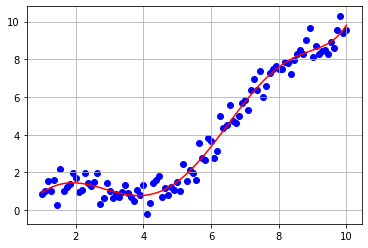

In [4]:
# fit a polynomial of order 6
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

scale=StandardScaler()
x=scale.fit_transform(data_x)
poly=PolynomialFeatures(degree=6)
x_poly =poly.fit_transform(x)
poly.fit(x_poly,data_y)
l = LinearRegression()
l.fit(x_poly,data_y)
y_pred = l.predict(x_poly)

plt.grid()
plt.scatter(data_x,data_y,color='b')
plt.plot(data_x,y_pred,color='r')

In [5]:
# Implement gradient computation and theta update 
def gradient_descent(X, y, theta, alpha):
    for _ in range(500):
        theta= theta - alpha * (1/len(X)) * (X.T @ ((X @ theta) - y))
    return theta

In [16]:
# Call stochastic gradient descent in the main loop
n = x_poly.shape[0]
LR = 0.00001 
sample_size = 10
epochs = 100000

theta = np.zeros(x_poly.shape[1]).reshape(x_poly.shape[1],1)
costs = []
for i in range(epochs): 
    idx = np.random.choice(n,sample_size,replace = False)
    
    x_sample = x_poly[idx]
    y_sample = data_y[idx]
    
    pred = x_sample @ theta
    grad_theta = (2/sample_size)*(x_sample.T @ (pred - y_sample))
    theta = theta - LR * grad_theta  

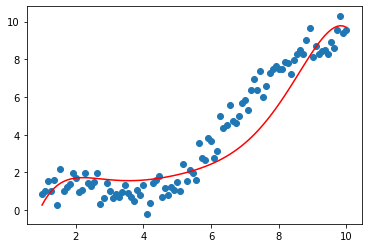

In [21]:
# predict y_hat using x and theta 
# plot x vs y in blue
# plot x vs y_hat in red

plt.scatter(data_x,data_y)
plt.plot(data_x, x_poly@theta,'r')